<a href="https://colab.research.google.com/github/lucianapopa/Python_Data_Analysis_Event_Alura/blob/main/notebooks/Classes_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASS 01

Data Analysis with Pandas

In [1]:
import pandas as pd

# Library used for data analysis.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

# 'pd' is used to retrieve the library for database reading.

# If a link is included on the code it must be between quotes.

In [3]:
df.head()

# This command is used to visualize the data inside the file.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
# We can see that the data is organized, but it suggests that improvements must be done to enhance data
# analysis and further visualization.

# The data presents information on employees seniority, job title, salary, location, work location, among other data.

# Analysis regarding the relationship between experience level and salary across different job sectors might be valuable
# when analyzing which job has higher salaries,or even in comparison with other metrics for example analyzing salaries
# with a company's revenue.

In [5]:
df.info()

# To obtain general information about the database.

# We can observe the columns, quantity of information, if there is null values or not, and the data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.describe()

# To visualize descriptive statistic data.

# Utilizes numeric values.

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

# Since it is an attribute instead of method or function parenthesis is not used.

# Tuples and columns quantities are displayed.

(133349, 11)

In [8]:
lines, columns = df.shape[0], df.shape[1]

print("Lines:", lines)
print("Columns:", columns)

Lines: 133349
Columns: 11


In [9]:
df.columns

# We can see all the columns' names at once.

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
df = df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
})

display(df.head())

# As part of the practice, I've changed the column names from English to Brazilian Portuguese.

# If I decide to rename columns again, the previous line must be previously run.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [11]:
df["senioridade"].value_counts()

# Verifying each category frequency within the 'experience level' column.

# We can see that the majority of analysed employees are seniors.

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
df["contrato"].value_counts()

# Employment contract frequency: full-time, contract, part-time, freelancer.

# The majority of contracts are full-time.

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
df["remoto"].value_counts()

# 0 = presencial/ on-site
# 50 = remoto/ remote
# 100 = hibridas/ hybrid

# The majority of employees work on-site.

,count
remoto,
0,105312
100,27718
50,319


In [14]:
df["tamanho_empresa"].value_counts()

# The majority of companies are medium-sized.

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [15]:
# Renaming the categories within the columns replacing abbreviations for full terms for better understanding.

In [16]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Especialista'
}

df['senioridade'] = df['senioridade'].replace(senioridade)

display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Pleno,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Pleno,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [17]:
contrato = {
    'FT': 'Full-time',
    'CT': 'Contract',
    'PT': 'Part-time',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(contrato)

display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,0,US,M


In [18]:
tamanho_empresa = {
    'S': 'Startup',
    'M': 'Médio',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,100,US,Médio
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,100,US,Médio
2,2025.0,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,0,AU,Médio
3,2025.0,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,0,AU,Médio
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,0,US,Médio


In [19]:
remoto = {
    0: 'Presencial',
    50: 'Remoto',
    100: 'Híbrido'
}

df['remoto'] = df['remoto'].replace(remoto)

display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Híbrido,US,Médio
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Híbrido,US,Médio
2,2025.0,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [20]:
df.head()

# The categories and columns are now clearly defined.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Híbrido,US,Médio
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Híbrido,US,Médio
2,2025.0,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [21]:
df.describe(include = "object")

# General information on the categorical variables.

# Here we have:
# Count: how many values we have on a column,
# Unique: unique values within each column,
# Top: most frequent information within each column,
# Freq: how many time the most frequent value appears on each column.

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Full-time,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [22]:
df.describe()

# General data on categorical data.

# There is over 100,000 analysed data.

# For statistical purposes all the metrics present on the table are extremely useful such as central tendency
# measures, quartiles and min/max values.

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# CLASS 02

Data Preparation and Cleaning

In [23]:
df.isnull()

# Where there is no null value 'False' will be attributed to that value,
# otherwise, it will be 'True'.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.isnull().sum()

# This is used to capture in which columns we have null values, and their count.

# We can see that 10 rows on the 'ano'('work_year') column are missing.

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [25]:
df['ano'].unique()

# When retrieving the unique values within the 'ano' column, the years from 2020 to 2025 are present, as well as the NaN (not a number).

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [26]:
df[df.isnull().any(axis=1)]

# By filtering, the full database can be seen including only the rows where the 'ano' column is null.

# Now, we can see those 10 rows with missing values on the 'ano' column.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Full-time,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Full-time,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Full-time,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Full-time,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Full-time,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Full-time,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Full-time,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Full-time,Data Scientist,40000,USD,40000,JP,Híbrido,MY,Grande
133281,NaN,Pleno,Full-time,Machine Learning Engineer,180000,PLN,46597,PL,Híbrido,PL,Grande
133317,NaN,Pleno,Full-time,Data Scientist,130000,USD,130000,US,Remoto,US,Grande


Dealing with missing values using 'mean'

In [27]:
# When there are missing values we must deal with them in the best way to don't generate a negative impact
# in the database quality.

# For missing values cases, there are 3 options on how to deal with them:
# (i) Input values,
# (ii) delete values,
# (iii) measures of central tendency as imputation.

In [28]:
# Before Bruno and Daniele had null values for their wages. Then the average of the salaries was used to fill those missing values.

# If outliers are present in the database, the average won't be a good way of handling those missing values. In this case, we would use the median instead.

In [29]:
# A new data frame will be created so we can see how to deal with numerical missing values using mean.

import numpy as np
import pandas as pd

df_salaries = pd.DataFrame({
    'name': ["Ana", "Bruno", "Carlos", "Daniele","Val"],
    'salary': [4000, np.nan, 5000, np.nan, 100000]
})

# Calculating average wage and replacing null values by the rounded average:

df_salaries['salary_media'] = df_salaries['salary'].fillna(df_salaries['salary'].mean().round(2))

# Calculating median wage and replacing null values by the rounded average:

df_salaries['salary_median'] = df_salaries['salary'].fillna(df_salaries['salary'].median())

# Displaying the data:
df_salaries

,name,salary,salary_media,salary_median
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [30]:
'''We can also replace missing values with the previous value with the forward fill method.'''

import pandas as pd
import numpy as np

df_temperatures = pd.DataFrame({
  "Day": ["Monday","Tuesday","Wednesday","Thursday","Friday"],
  "Temperature": [30, np.nan, np.nan, 28, 27]
})

df_temperatures["filled_ffill"] = df_temperatures['Temperature'].ffill()

df_temperatures

,Day,Temperature,filled_ffill
0,Monday,30.0,30.0
1,Tuesday,NaN,30.0
2,Wednesday,NaN,30.0
3,Thursday,28.0,28.0
4,Friday,27.0,27.0


In [31]:
'''We can also replace missing values with the next value with the backward fill method.'''

import pandas as pd
import numpy as np

df_temperatures = pd.DataFrame({
  "Day": ["Monday","Tuesday","Wednesday","Thursday","Friday"],
  "Temperature": [30, np.nan, np.nan, 28, 27]
})

df_temperatures["filled_bfill"] = df_temperatures['Temperature'].bfill()

df_temperatures

,Day,Temperature,filled_bfill
0,Monday,30.0,30.0
1,Tuesday,NaN,28.0
2,Wednesday,NaN,28.0
3,Thursday,28.0,28.0
4,Friday,27.0,27.0


In [32]:
'''Missing values can also be replaced with a fixed value.'''
'''This example presents how to replace a null value with "Not informed".'''

import pandas as pd
import numpy as np

df_cities = pd.DataFrame({
  'name': ["Ana", "Bruno", "Carlos", "Daniele","Val"],
  'city': ["Sao Paulo", np.nan, "Curitiba", np.nan, "Belem"]

})

# Filling null values with fixed value.
df_cities['city_filled'] = df_cities['city'].fillna("Not informed")

df_cities

,name,city,city_filled
0,Ana,Sao Paulo,Sao Paulo
1,Bruno,NaN,Not informed
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Not informed
4,Val,Belem,Belem


In [33]:
#Going back to the dataset that is being used, we have 10 missing values in the 'ano' column.

#By analyzing the data and the possible handling methods, we can delete those rows with missing values,
#since our dataset has over 100,000 rows in total.

In [34]:
df_cleaned = df.dropna()

# This code will remove any row with missing values from the database.
# This does not change the original DataFrame because 'inplace=True' was not used.

In [35]:
df_cleaned.isnull().sum()

# Now we can see that there is no missing values anymore.

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [36]:
df_cleaned.head()

# We can see that the year (ano) column presents a '.0' after the year, which is not correct.

# Therefore, we will move forward to analyse the data structure.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Híbrido,US,Médio
1,2025.0,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Híbrido,US,Médio
2,2025.0,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Full-time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [37]:
df_cleaned.info()

# Since the year (ano) variable is float64, it is considering that it has decimals.

# To solve this issue, a transformation will be applied so the year is presented as integer.

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [38]:
# Transforming float64 data to int64:

df_cleaned = df_cleaned.assign(ano = df_cleaned['ano'].astype('int64'))

In [39]:
# Now, it is important to check if the data is correctly transformed.

df_cleaned

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Híbrido,US,Médio
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Híbrido,US,Médio
2,2025,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Híbrido,US,Grande
133345,2021,Pleno,Full-time,Principal Data Scientist,151000,USD,151000,US,Híbrido,US,Grande
133346,2020,Junior,Full-time,Data Scientist,105000,USD,105000,US,Híbrido,US,Startup
133347,2020,Junior,Contract,Business Data Analyst,100000,USD,100000,US,Híbrido,US,Grande


In [40]:
# A double-check that can be done is looking at the data information again.

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# CLASS 03

Generating visuals to communicate information from the dataset

In [41]:
df_cleaned.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Híbrido,US,Médio
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Híbrido,US,Médio
2,2025,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Seniority Distribution'}, xlabel='senioridade'>

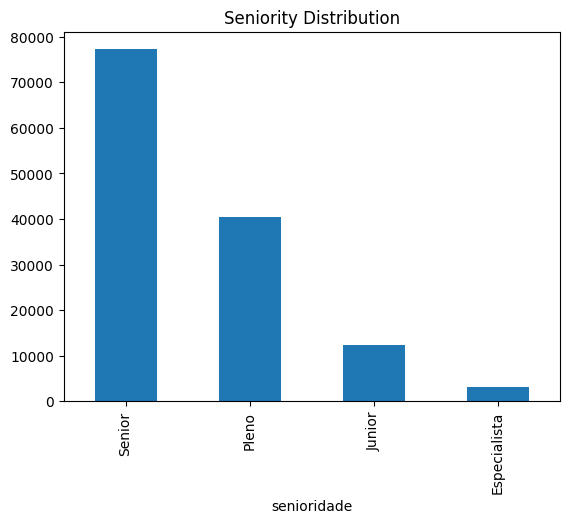

In [42]:
# We can use Pandas to create a simple graph, which is more limited than matplotlib and seaborn in terms of visual customization.

df_cleaned['senioridade'].value_counts().plot(kind = 'bar', title = 'Seniority Distribution')

# We can begin to deeper understanding the data. For example, we can see that this company has much more seniors than middle (pleno) and entry-levels (junior).
# Is this company preparing for business continuity in the future? It is important to relate what data shows with the problem we as analysts must help to solve.

In [43]:
import seaborn as sns

# This library is interesting because it allows the user to plot additional information on the visuals, such as standard deviation.

<Axes: xlabel='senioridade', ylabel='usd'>

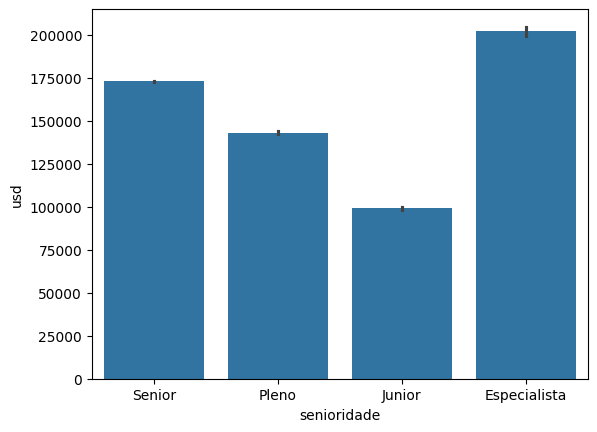

In [44]:
sns.barplot(data = df_cleaned, x = 'senioridade', y = 'usd')

In [45]:
# We are now importing the matplotlib to work alongside with the pandas and seaborn libraries.

import matplotlib.pyplot as plt

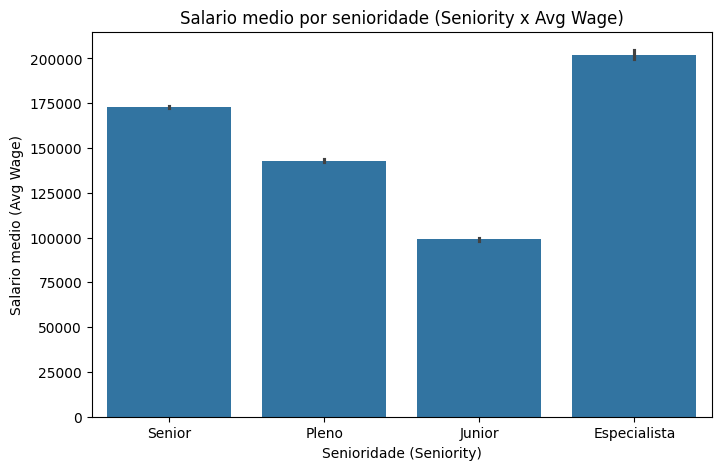

In [46]:
# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.barplot(data = df_cleaned, x = 'senioridade', y = 'usd')

# Defining the axis labels:
plt.title('Salario medio por senioridade (Seniority x Avg Wage)')
plt.xlabel('Senioridade (Seniority)')
plt.ylabel('Salario medio (Avg Wage)')

# Showing the plot:
plt.show()

In [47]:
# Grouping data:
df_cleaned.groupby('senioridade')['usd'].mean().sort_values(ascending = False)

,usd
senioridade,
Especialista,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [48]:
# Creating a new variable with the grouped data:

'''The '.index' in the end indicates that we want to save this information inside the variable called 'order'.'''

order = df_cleaned.groupby('senioridade')['usd'].mean().sort_values(ascending = False).index

order

Index(['Especialista', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

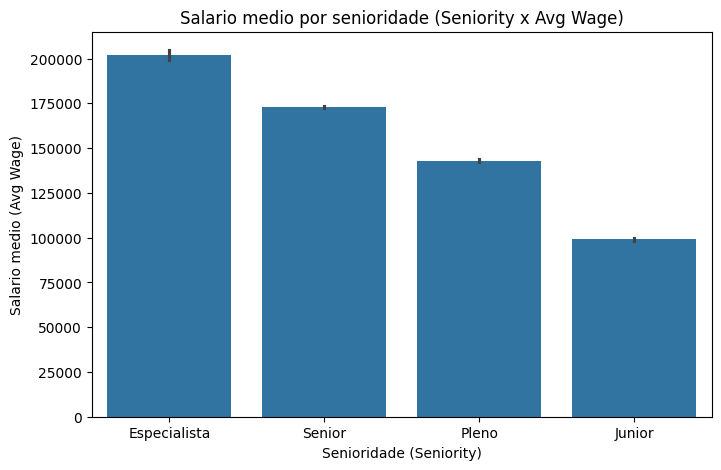

In [49]:
'''Recreating the visual with the new variable'''

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.barplot(data = df_cleaned, x = 'senioridade', y = 'usd', order = order)

# Defining the axis labels:
plt.title('Salario medio por senioridade (Seniority x Avg Wage)')
plt.xlabel('Senioridade (Seniority)')
plt.ylabel('Salario medio (Avg Wage)')

# Showing the plot:
plt.show()

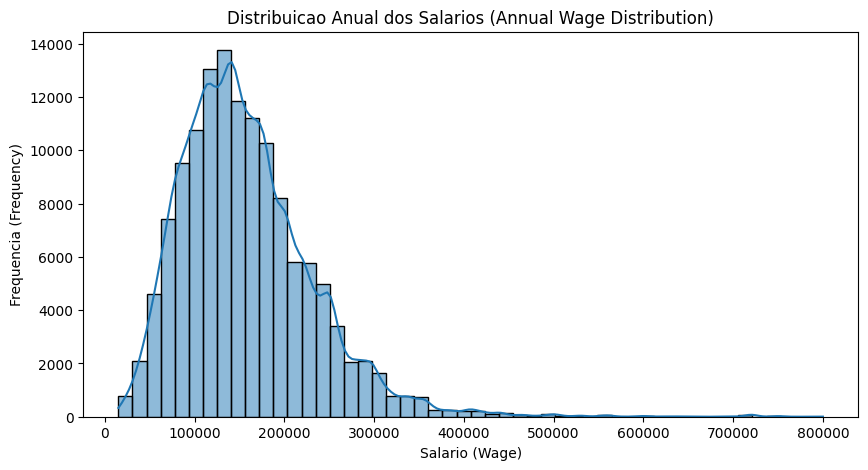

In [50]:
'''Creating a Histogram'''

# The visual bellow shows that the distribution is not normal since the data is more concentrated on the left side where the lower values are (right skewed).'''

# If the distribution was normal we would have the peak in the center of the plot.'''

# Defining figure size:
plt.figure(figsize = (10,5))

# Using seaborn to plot the visual and adding a kde line (density line):

sns.histplot(df_cleaned['usd'], bins = 50, kde = True)

# Defining the axis labels:
plt.title('Distribuicao Anual dos Salarios (Annual Wage Distribution)')
plt.xlabel('Salario (Wage)')
plt.ylabel('Frequencia (Frequency)')

plt.show()

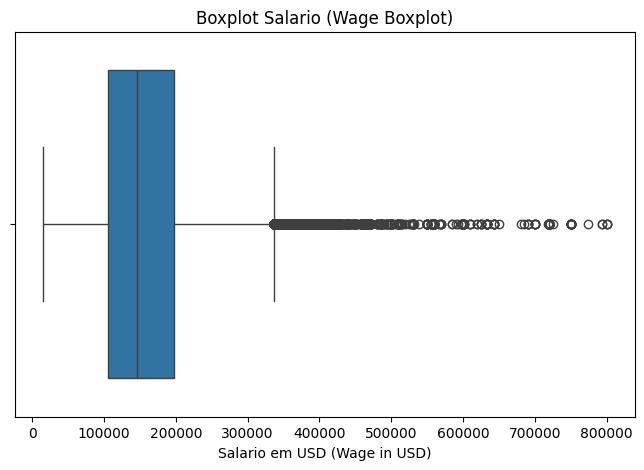

In [51]:
'''Creating a Boxplot'''

# We can obtain meaningful information through this visual, such as the median (the central line on the graph), the quartiles, and outliers (dots).

# It enhances the insights from the Histogram but presents them in a different format.

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.boxplot(x  = df_cleaned ['usd'])

# Defining the axis labels:
plt.title('Boxplot Salario (Wage Boxplot)')
plt.xlabel('Salario em USD (Wage in USD)')

plt.show()

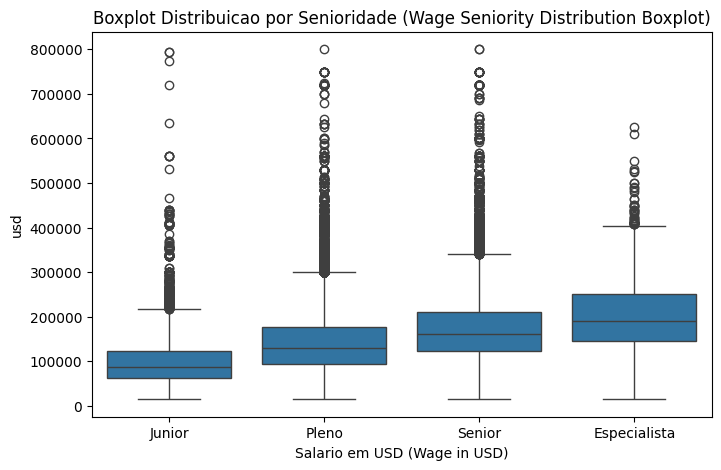

In [52]:
'''Creating a Boxplot for each wage seniority level'''

# The company can set goals of salaries to attract talents by using the information obtained in this visual.

order_senioridade = ['Junior', 'Pleno', 'Senior', 'Especialista']

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual:
sns.boxplot(x = 'senioridade', y = 'usd', data = df_cleaned, order = order_senioridade)

# Defining the axis labels:
plt.title('Boxplot Distribuicao por Senioridade (Wage Seniority Distribution Boxplot)')
plt.xlabel('Salario em USD (Wage in USD)')

plt.show()

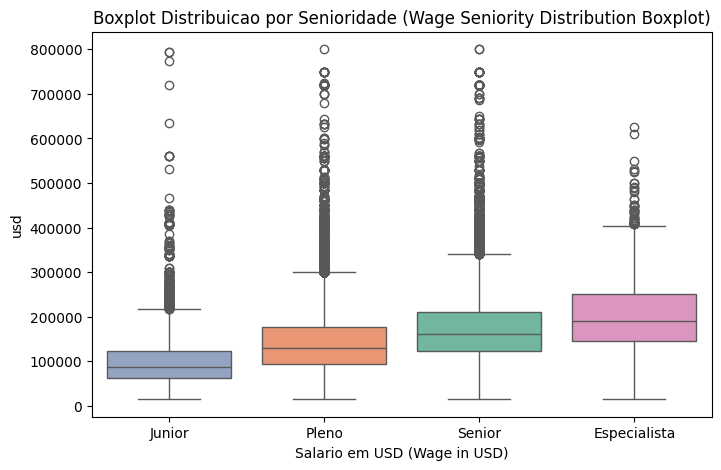

In [53]:
'''Changing bin colors on the Boxplot for each wage seniority level'''

# The company can set goals of salaries to atract talents by using the information obtained in this visual.

order_senioridade = ['Junior', 'Pleno', 'Senior', 'Especialista']

# Defining the figure size:
plt.figure(figsize = (8,5))

# Using seaborn to plot the visual and adding colors for each bin using 'palette' and 'hue':
sns.boxplot(x = 'senioridade', y = 'usd', data = df_cleaned, order = order_senioridade, palette = 'Set2', hue = 'senioridade')

# Defining the axis labels:
plt.title('Boxplot Distribuicao por Senioridade (Wage Seniority Distribution Boxplot)')
plt.xlabel('Salario em USD (Wage in USD)')

plt.show()

In [54]:
import plotly.express as px

# By importing this library we can create visuals where we can see information by hovering over each bin of a bar graph for example.

In [55]:
'''Creating a Bar Plot of average salary by seniority using Plotly'''

# Grouping data by seniority and calculating the mean salary, then sorting in descending order
df_avg_salary_by_seniority = df_cleaned.groupby('senioridade')['usd'].mean().reset_index().sort_values(by='usd', ascending=False)

# Defining the order of seniority levels for the plot based on the sorted data
order_senioridade = df_avg_salary_by_seniority['senioridade'].tolist()

# Creating the Bar Plot
fig = px.bar(df_avg_salary_by_seniority,
             x='senioridade',
             y='usd',
             title='Salario medio por senioridade (Seniority x Avg Wage)',
             labels={'senioridade': 'Senioridade (Seniority)', 'usd': 'Salario medio (Avg Wage)'},
             category_orders={'senioridade': order_senioridade})

# Displaying the plot
fig.show()

In [56]:
'''Creating a pie plot of average salary by seniority using Plotly'''

remote_counting = df_cleaned['remoto'].value_counts().reset_index()
remote_counting.columns = ['tipo_trabalho', 'quantidade']

# Creating the pie plot
fig = px.pie(remote_counting,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporcao Tipo de Trabalho (Work Type Proportion)'
             )

# Displaying the plot
fig.show()

In [57]:
'''Creating a donut plot of average salary by seniority using Plotly'''

remote_counting = df_cleaned['remoto'].value_counts().reset_index()
remote_counting.columns = ['tipo_trabalho', 'quantidade']

# Creating the pie plot
fig = px.pie(remote_counting,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporcao Tipo de Trabalho (Work Type Proportion)',
             hole = 0.5   # Donut hole size.
             )

fig.update_traces(textinfo = 'percent + label')  # Displays not only the percentage, but also the label of each category.

# Displaying the plot
fig.show()

In [66]:
'''CHALLENGE: Create a visual to represent the data scientists average wage per country'''

!pip install pycountry

In [67]:
import pycountry

# Function to convert ISO-2 to ISO-3:
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Creating a new column with the ISO-3 code:
df_cleaned['residencia_iso3'] = df_cleaned['residencia'].apply(iso2_to_iso3)

# Calculating the salary average per country (ISO-3):
df_ds = df_cleaned[df_cleaned['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Generating a map:
fig = px.choropleth(media_ds_pais,
                    locations = 'residencia_iso3',
                    color = 'usd',
                    color_continuous_scale = 'rdylgn',
                    title = 'Salario medio de Cientista de Dados por pais (Data Scientist Wage by Country)',
                    labels = {'usd': 'Salario medio (Avg Wage)', 'residencia_iso3': 'Pais (Country)'}
                    )
fig.show()

For the countries where the color is white, there is no available data.

In [68]:
df_cleaned.head()

# Just checking how the database changed after the map visual creation.

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Full-time,Solutions Engineer,214000,USD,214000,US,Híbrido,US,Médio,USA
1,2025,Senior,Full-time,Solutions Engineer,136000,USD,136000,US,Híbrido,US,Médio,USA
2,2025,Pleno,Full-time,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Full-time,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Full-time,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [69]:
df_cleaned.to_csv('dados-imersao-final.csv', index = False)

# Saving the final cleaned data.

# CLASS 04

Dashboard Creation

For this class VS Code will be used. Thefore the following steps we're applied on the VS Code terminal.

**1. Virtual environment creation:**

python3 -m venv .venv

**2. Virtual environment activation for Windows:**

.venv\Scripts\Activate

**3. Virtual environment activation for MAC/OS:**

source .venv/bin/activate

**4. Create a new file ('requirements.txt') with all the libraries (requirements) that will be used on this project:**

VS Code > File > New text file > insert the text bellow:

* pandas==2.2.3
* streamlit==1.44.1
* plotly==5.24.1

**5. Installation of the libraries:**

pip install -r requirements.txt

**6. Create the Streamlit Dashboard interface:**

The Streamlit is the library that will allow us to create a page for the dashboard.

**7. Deploy the Dashboard on Streamlit Cloud:**

https://streamlit.io/cloud


>> The full code written on the VS Code file (app.py) it's down bellow.

In [1]:
# Full code used on VS Code file (app.py):

'''

import streamlit as st
import pandas as pd
import plotly.express as px

# --- Set Page ---
# Defines page title, icon and layout.
st.set_page_config(
    page_title="Salary Dashboard in the Data Field",
    page_icon="📊",
    layout="wide",
)

# --- Data Retrieving ---
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

# --- Translating Column Names ---
df = df.rename(columns={
    'ano': 'year',
    'senioridade': 'seniority',
    'contrato': 'contract',
    'cargo': 'job_title',
    'salario': 'salary',
    'moeda': 'currency',
    'residencia': 'residence',
    'remoto': 'work_type',
    'empresa': 'company_location',
    'tamanho_empresa': 'company_size',
    'residencia_iso3': 'country_iso3',
})

# --- Sidebar (Filters) ---
# This section creates a sidebar for filtering the data based on various criteria such as year, seniority, contract and company size.
st.sidebar.header("🔍 Filters")

# Dictionaries: PT → EN
seniority_map = {
    'executivo': 'Executive',
    'junior': 'Junior',
    'pleno': 'Mid-level',
    'senior': 'Senior'
}
contract_map = {
    'contrato': 'Contract',
    'freelancer': 'Freelancer',
    'integral': 'Full-time',
    'parcial': 'Part-time'
}
size_map = {
    'grande': 'Large',
    'media': 'Medium',
    'pequena': 'Small'
}

# Year Filter
# Unique years are extracted from the DataFrame and sorted for display.
available_years = sorted(df['year'].unique())
selected_years = st.sidebar.multiselect("Year", available_years, default=available_years)

# Seniority Filter
# Unique seniority levels are extracted from the DataFrame and sorted for display.
available_seniority = sorted(df['seniority'].unique())
selected_seniority = st.sidebar.multiselect("Seniority", available_seniority, default=available_seniority, format_func=lambda x: seniority_map.get(str(x).lower(), x))

# Contract Filter
# Unique contract types are extracted from the DataFrame and sorted for display.
available_contract = sorted(df['contract'].unique())
selected_contract = st.sidebar.multiselect("Contract", available_contract, default=available_contract,  format_func=lambda x: contract_map.get(str(x).lower(), x))

# Company Size Filter
# Unique company sizes are extracted from the DataFrame and sorted for display.
available_sizes = sorted(df['company_size'].unique())
selected_sizes = st.sidebar.multiselect("Company Size", available_sizes, default=available_sizes, format_func=lambda x: size_map.get(str(x).lower(), x))

# --- DataFrame Filtering ---
# The main DataFrame is filtered based on the selections made in the sidebar.
df_filtered = df[
    (df['year'].isin(selected_years)) &
    (df['seniority'].isin(selected_seniority)) &
    (df['contract'].isin(selected_contract)) &
    (df['company_size'].isin(selected_sizes))
]

# --- Main Content ---
# Title and Introduction
st.title("🎲 Salary Analysis Dashboard in the Data Field")
st.markdown("Explore salary data in the data field over the past years. Use the filters on the left to refine your analysis.")

# --- Main Metrics (KPIs) ---
# This section displays key performance indicators based on the filtered DataFrame.
st.subheader("General Metrics (Annual Salary in USD)")

if not df_filtered.empty:
    avg_salary = df_filtered['usd'].mean()
    max_salary = df_filtered['usd'].max()
    total_count = df_filtered.shape[0]
    most_common_job_position = df_filtered["job_title"].mode()[0]
else:
    avg_salary, max_salary, total_count, most_common_job_position = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Avg. Salary", f"${avg_salary:,.0f}")
col2.metric("Max. Salary", f"${max_salary:,.0f}")
col3.metric("Total Count", f"{total_count:,}")
col4.metric("Most Common Job Position", most_common_job_position)

st.markdown("---")

# --- Visual Analysis with Plotly ---
# This section contains various visualizations to analyze the data based on the filters applied.
st.subheader("Visuals (Charts and Graphs)")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtered.empty:
        top_job_title = df_filtered.groupby('job_title')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        graph_job_title = px.bar(
            top_job_title,
            x='usd',
            y='job_title',
            orientation='h',
            title="Top 10 Job Positions by Average Salary",
            labels={'usd': 'Avg. Annual Salary (USD)', 'Job Position': ''}
        )
        graph_job_title.update_traces(
            marker_color="#0d0887",
            marker_line_color="white",
            marker_line_width=0.5
        )
        graph_job_title.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(graph_job_title, use_container_width=True)
    else:
        st.warning("No data to display in the job positions chart.")

with col_graf2:
    if not df_filtered.empty:
        graph_hist = px.histogram(
            df_filtered,
            x='usd',
            nbins=30,
            title="Annual Salary Distribution",
            labels={'usd': 'Salary Range (USD)', 'count': ''}
        )
        graph_hist.update_traces(
            marker_color="#0d0887",
            marker_line_color="white",
            marker_line_width=0.5
        )
        graph_hist.update_layout(title_x=0.1)
        st.plotly_chart(graph_hist, use_container_width=True)
    else:
        st.warning("No data to display in the distribution chart.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtered.empty:
        remote_count = df_filtered['work_type'].replace({
            'presencial': 'On-site',
            'hibrido': 'Hybrid',
            'remoto': 'Remote'
        }).value_counts().reset_index()
        remote_count.columns = ['Work Type', 'Count']
        graph_work_type = px.pie(
            remote_count,
            names='Work Type',
            values='Count',
            color='Work Type',
        color_discrete_map={
            'On-site': '#0d0887',   # dark blue
            'Hybrid':  '#d8576b',   # light purple/ pink
            'Remote':  '#9c179e'    # purple
        },
            category_orders={'Work Type': ['On-site', 'Hybrid', 'Remote']},
            title='Proportion of Work Types',
            hole=0.5
        )
        graph_work_type.update_traces(textinfo='percent+label')
        graph_work_type.update_layout(title_x=0.1)
        st.plotly_chart(graph_work_type, use_container_width=True)
    else:
        st.warning("No data to display in the work types chart.")

with col_graf4:
    if not df_filtered.empty:
        df_ds = df_filtered[df_filtered['job_title'] == 'Data Scientist']
        countries_avg = df_ds.groupby('country_iso3')['usd'].mean().reset_index()
        graph_countries = px.choropleth(countries_avg,
            locations='country_iso3',
            color='usd',
            color_continuous_scale='RdBu',
            title='Avg. Data Scientist Salary by Country',
            labels={'usd': 'Avg. Salary (USD)', 'country_iso3': 'Country'})
        graph_countries.update_layout(title_x=0.1)
        st.plotly_chart(graph_countries, use_container_width=True)
    else:
        st.warning("No data to display in the countries chart.")

# --- Detailed Data Table ---
# This section displays the filtered DataFrame in a table format for detailed analysis.
st.subheader("Detailed Data Table")
st.dataframe(df_filtered)

'''

'\n\nimport streamlit as st\nimport pandas as pd\nimport plotly.express as px\n\n# --- Set Page ---\n# Defines page title, icon and layout.\nst.set_page_config(\n    page_title="Salary Dashboard in the Data Field",\n    page_icon="📊",\n    layout="wide",\n)\n\n# --- Data Retrieving ---\ndf = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")\n\n# --- Translating Column Names ---\ndf = df.rename(columns={\n    \'ano\': \'year\',\n    \'senioridade\': \'seniority\',\n    \'contrato\': \'contract\',\n    \'cargo\': \'job_title\',\n    \'salario\': \'salary\',\n    \'moeda\': \'currency\',\n    \'residencia\': \'residence\',\n    \'remoto\': \'work_type\',\n    \'empresa\': \'company_location\',\n    \'tamanho_empresa\': \'company_size\',\n    \'residencia_iso3\': \'country_iso3\',\n})\n\n# --- Sidebar (Filters) ---\n# This section creates a sidebar for filtering the data based on various criteria such as year, seniority,